In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# 获取数据

In [2]:
dataset = load_diabetes()

In [3]:
dataset.data.shape, dataset.target.shape

((442, 10), (442,))

In [4]:
dataset.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

# 划分数据集

In [5]:
x_train, x_val, y_train, y_val = train_test_split(
    dataset.data, dataset.target, test_size=0.2, random_state=0
)

In [6]:
y_train.shape, y_val.shape

((353,), (89,))

<AxesSubplot: ylabel='Density'>

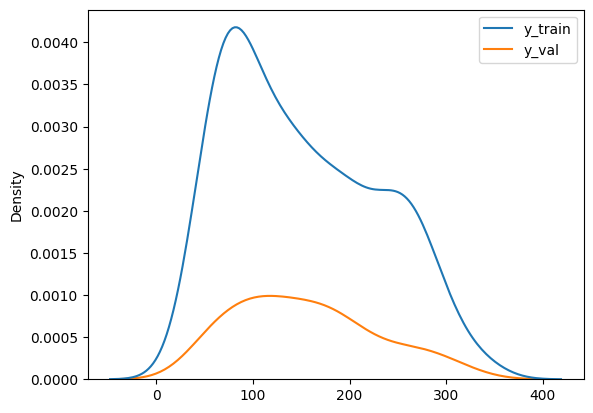

In [7]:
# 数组传值没法正确显示label
sns.kdeplot({"y_train": y_train, "y_val": y_val})

# 特征值标准化

In [8]:
scaler = StandardScaler()

In [9]:
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [10]:
x_train[0], x_train_scaled[0]

(array([ 0.01264814,  0.05068012,  0.00241654,  0.0563009 ,  0.02732605,
         0.01716188,  0.04127682, -0.03949338,  0.00370906,  0.07348023]),
 array([ 0.24396182,  1.02582922,  0.06364526,  1.21073305,  0.59073628,
         0.38324757,  0.87925828, -0.83072415,  0.07510266,  1.49297091]))

# 训练Ridge

In [11]:
estimator = Ridge()

In [12]:
estimator.fit(x_train_scaled, y_train)

Ridge()

In [13]:
# 得分很低,因为不是分类,是回归
estimator.score(x_val_scaled, y_val)

0.331092906976182

In [14]:
# 使用不正则化数据分数更低
estimator.score(x_val, y_val)

0.03759658730429738

## 误差评估

In [15]:
y_predict_scaled = estimator.predict(x_val_scaled)
y_predict_scaled[:10]

array([237.87936768, 248.8923923 , 163.96119272, 120.61945676,
       186.64064712, 258.95008401, 113.46625741, 187.92664051,
       151.07495374, 235.18270413])

<AxesSubplot: ylabel='Density'>

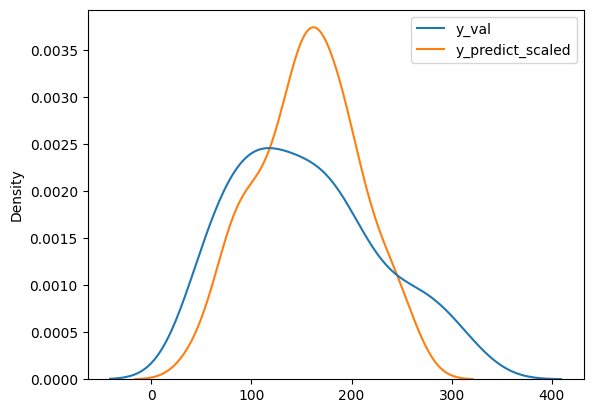

In [16]:
sns.kdeplot({"y_val": y_val, "y_predict_scaled": y_predict_scaled})

In [17]:
mean_squared_error(y_val, y_predict_scaled)

3430.10676248457

In [18]:
y_predict = estimator.predict(x_val)
y_predict[:10]

array([155.73302219, 156.30736647, 152.12357372, 150.03506054,
       153.21492156, 156.8069587 , 149.69477416, 153.33934418,
       151.49690097, 155.63238778])

<AxesSubplot: ylabel='Density'>

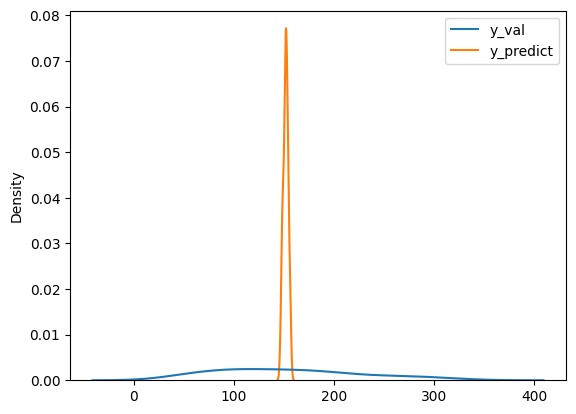

In [19]:
sns.kdeplot({"y_val": y_val, "y_predict": y_predict})

In [20]:
mean_squared_error(y_val, y_predict)

4935.134473163993

# 训练RidgeCV

In [22]:
estimator_cv = RidgeCV(alphas=(0.001, 0.01, 0.1, 1, 10))

In [27]:
estimator_cv.fit(x_train_scaled, y_train)

RidgeCV(alphas=(0.001, 0.01, 0.1, 1, 10))

In [28]:
# 得分很低,因为不是分类,是回归
estimator_cv.score(x_val_scaled, y_val)

0.3312626703312538

In [29]:
# 使用不正则化数据分数更低
estimator_cv.score(x_val, y_val)

0.03638475555065013

## 误差评估

In [30]:
y_predict_scaled = estimator_cv.predict(x_val_scaled)
y_predict_scaled[:10]

array([235.58444758, 247.35671705, 163.75671836, 121.46420348,
       184.3119152 , 256.81882456, 113.39789113, 187.17504442,
       153.840545  , 231.61331396])

<AxesSubplot: ylabel='Density'>

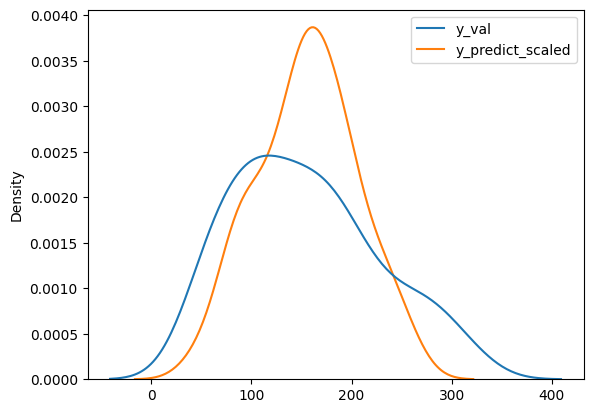

In [31]:
sns.kdeplot({"y_val": y_val, "y_predict_scaled": y_predict_scaled})

In [32]:
mean_squared_error(y_val, y_predict_scaled)

3429.2362283874936

In [33]:
y_predict = estimator_cv.predict(x_val)
y_predict[:10]

array([155.62860337, 156.21999867, 152.12413322, 150.08896907,
       153.11794955, 156.69468434, 149.70434806, 153.29948161,
       151.64984218, 155.45091682])

<AxesSubplot: ylabel='Density'>

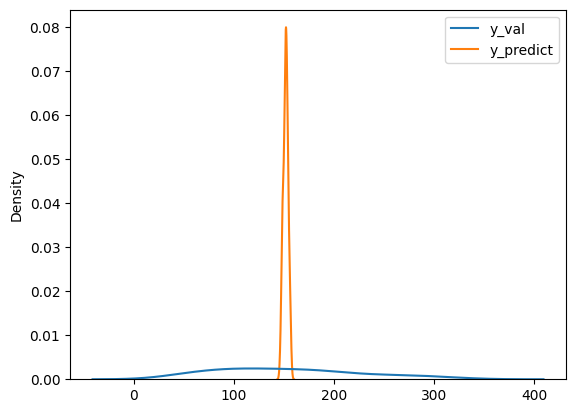

In [34]:
sns.kdeplot({"y_val": y_val, "y_predict": y_predict})

In [35]:
mean_squared_error(y_val, y_predict)

4941.348657968625